## Definições de variáveis iniciais

In [15]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
crossover_rate = 1
mutation_rate = 0.8

base_population = 20
pop_sample = 5

fitness_history = []

---
## Funções de suporte

In [17]:
def argsort(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)

---
## Definição da População Inicial

In [18]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

## Avaliação de candidatos

In [19]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

## Seleciona nova população

In [20]:
def select_parents(pupulation):

    sample_pop = rd.sample(pupulation, pop_sample)

    sample_pop_fit = [0] * pop_sample
    for i in range(len(sample_pop_fit)):
        sample_pop_fit[i] = fitness_nq(sample_pop[i])

    parents_id = np.argsort(sample_pop_fit)[:2]
    parents = [sample_pop[parents_id[0]],
               sample_pop[parents_id[1]]]
    return parents

## Recombinação dos pais

In [21]:
def cut_and_crossfill(N, parents):
    cross_point = rd.randint(1, N-1)

    p1 = [parents[0][:cross_point] , parents[0][cross_point:]]
    p2 = [parents[1][:cross_point] , parents[1][cross_point:]]

    f1 = p1[0]
    f2 = p2[0]
    for i in range(len(p1[1])):
        f1.append(p2[1][i])
        f2.append(p1[1][i])

    return [f1, f2]

## Mutação dos filhos

In [22]:
def mutate_offspring(offspring, mutation_rate, N):
    for of in offspring:
        if rd.random() < mutation_rate:
            id1 = rd.randint(0, N-1)
            id2 = rd.randint(0, N-1)
            aux = of[id1]
            of[id1] = of[id2]
            of[id2] = aux
    return offspring

## Cria e seleciona nova geração

In [23]:
def select_new_generation(poulation, offspring):
    new_generation = poulation + offspring

    new_pop_fit = [0] * len(new_generation)
    for i in range(len(new_generation)):
        new_pop_fit[i] = fitness_nq(new_generation[i])

    new_pop_id = argsort(new_pop_fit)[:base_population]

    next_generation = []
    for i in range(len(new_generation)):
        if i in new_pop_id:
            next_generation.append(new_generation[i])

    return next_generation

## Verificação de condição de parada

In [24]:
def verify_condition(pupulation):
    return 0 in pupulation

## Desenha gráfico

In [25]:
def draw_graph(datax, datay):
    plt.plot(range(datax+1), datay[0], "-g", label="Medium")
    plt.plot(range(datax+1), datay[1], "-r", label="Best")
    plt.legend(loc="upper right")
    plt.xlabel('Generation')
    plt.ylabel('Fittness')
    plt.show()

## Execução

Número de rainhas do problema:  30
Máximo de gerações:  300

Fittness da população inicial:
[32, 44, 50, 34, 36, 28, 40, 34, 32, 34, 44, 48, 40, 50, 48, 46, 42, 44, 38, 50]

Geração final:  300

Fittness da população final:
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


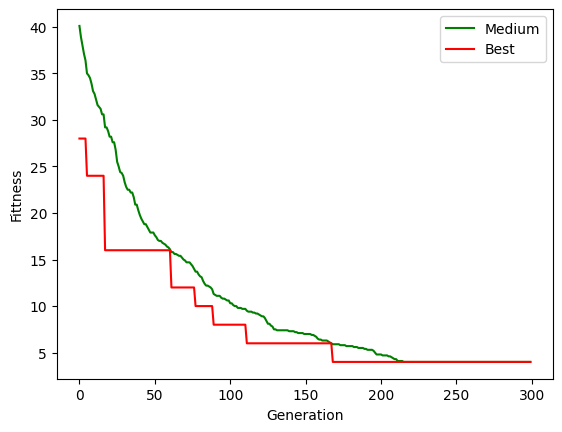

In [26]:
N = 0
try:
    N = int(input())
except:
    raise ValueError('ERROR: o valor digitado não é valido!')

max_generation = 10 * N
print("Número de rainhas do problema: ", N)
print("Máximo de gerações: ", max_generation)
print()

pupulation = init_population(base_population, N)
population_fitt = [0] * base_population

for i in range(base_population):
    population_fitt[i] = fitness_nq(pupulation[i])
print("Fittness da população inicial:")
print(population_fitt)

count_gen = 0
datay = [[], []]
for i in range(max_generation):
    parents = select_parents(pupulation)

    offspring = cut_and_crossfill(N, parents)

    mutate_offspring(offspring, mutation_rate, N)

    pupulation = select_new_generation(pupulation, offspring)

    for j in range(base_population):
        population_fitt[j] = fitness_nq(pupulation[j])

    datay[0].append(sum(population_fitt) / len(population_fitt))
    datay[1].append(min(population_fitt))

    count_gen = i
    if verify_condition(population_fitt):
        break

print()
print("Geração final: ", (count_gen+1))
print()
print("Fittness da população final:")
print(population_fitt)

draw_graph(count_gen, datay)